# Series Transistor Voltage Regulator

The goal of this section is to replicate the work from the previous notebook [*Voltage Regulator*](./Diode_Zener), with the main difference being that this circuit includes additional components that were not present in the earlier design.


## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.WaveForm import OperatingPoint

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction to the Regulator

Before building our circuit, we first need to define the logical blocks that compose it. These blocks are illustrated in  [](bloc_logique_diode_zener_second_notebook).

```{figure} ./images/bloc_logique.svg
:name: bloc_logique_diode_zener_second_notebook
:align: center
:width: 500px

Logical blocks of a regulator
```

We can see that the regulator is made up of four logical blocks. The goal is to eventually construct an electronic circuit that performs voltage regulation.

## Electronic Circuit

The circuit that will be studied is shown in [](#regulateur_tension_serie_transistor_2):

```{figure} ./images/regulateur_tension_serie_transistor_2.svg
:name: regulateur_tension_serie_transistor_2
:align: center
:width: 500px

Series voltage regulator with a transistor
````

This circuit is very similar to the one presented in the section
[*Zener Diode Voltage Regulator*](./Diode_Zener).

The common points are as follows. First, the Zener diode $D_1$ is still used as the voltage reference for the regulator. However, in this design it is **not** connected to the base of the transistor; instead, it is connected to its **emitter**, which adds approximately $0.7\ \text{V}$ to the output voltage due to the base–emitter junction.

Another similarity is that current is still supplied by a series pass transistor $Q_2$, which delivers power to the load $R_L$.

There are, however, two major differences.
First, an additional transistor $Q_1$ is introduced between the Zener diode $D_1$ and the transistor that delivers current to the load ($Q_2$).
Second, between the load and transistor $Q_2$, two resistors are connected in parallel with $R_L$. These resistors form a voltage divider used to **measure the output voltage**.

Finally, transistor $Q_1$ provides the **error detection** function of the regulator.

All functional blocks are summarized in [](#regulateur_tension_serie_transistor_2_with_bloc).

```{figure} ./images/regulateur_tension_serie_transistor_2_with_bloc.svg
:name: regulateur_tension_serie_transistor_2_with_bloc
:align: center
:width: 500px

Series voltage regulator with a transistor — block diagram
```

## Equations

The objective of this section is to present the key equations used to characterize the circuit.

### Output Voltage Equation

$$U_\text{out} = \frac{U_\text{Z1} + U_\text{BE}}{R_1} \cdot (R_1 + R_2)$$

Thus, the output voltage depends on several parameters but does **not** depend on $R_L$.  
This makes it much easier to adjust and control the output voltage.

### Power Dissipated by the Transistor

Only transistor $Q_2$ may pose issues regarding power dissipation. Transistor \(Q_1\) does not suffer from this limitation, so its power dissipation is rarely calculated.

$$P_{Q2} = U_\text{CE2} \cdot I_\text{C2}$$

To obtain $U_\text{CE2}$:

$$U_\text{CE2} = U_\text{in} - U_\text{out}$$

This shows that the greater the voltage difference, the more powerful the transistor must be.

To obtain $I_\text{C2}$:

$$I_\text{C2} = I_\text{E2} \cdot \frac{\beta_\text{CC}}{\beta_\text{CC} + 1}$$

And to obtain $I_\text{E2}$:

$$I_\text{E2} = I_{R1} + I_\text{out}$$

Understanding these relationships is essential for analyzing how the circuit behaves under different operating conditions.

## Demonstration

```{figure} ./images/regulateur_tension_serie_transistor_2_demonstration.svg
:name: regulateur_tension_serie_transistor_2_demonstration
:align: center
:width: 500px

Series voltage regulator with transistor — diagram for the demonstration
```

### Output Voltage

We first compute the voltage across $R_1$. To do this, we examine the loop formed by $D_1$, $Q_1$, and $R_1$. From this loop, we obtain:

$$U_{R1} = U_{Z1} + U_{BE1}$$

Then, the current through $R_1$ can be computed using Ohm’s law:

$$I_{R1} = \frac{U_{R1}}{R_1}$$

We can determine $I_{R2}$ by assuming that the base current of transistor $Q_1$ is approximately zero, i.e. $I_{B1} \approx 0$. Applying Kirchhoff’s current law at the node:

$$I_{R1} = I_{B1} + I_{R2}$$

Since $I_{B1} \approx 0$:

$$I_{R1} \approx I_{R2}$$

We can now compute the voltage across resistor $R_2$:

$$U_{R2} = I_{R2} \cdot R_2$$

Finally, to obtain the output voltage across $R_L$, we consider the loop including $R_1$, $R_2$, and $R_L$. This yields:

$$U_\text{out} = U_{R2} + U_{R1}$$

Substituting the expressions:

$$U_\text{out} = R_2 \cdot I_{R2} + R_1 \cdot I_{R1}$$

Since $I_{R1} = I_{R2}$:

$$U_\text{out} = I_{R1} \cdot (R_1 + R_2)$$

Using:

$$I_{R1} = \frac{U_{R1}}{R_1}$$
and
$$U_{R1} = U_{Z1} + U_{BE1}$$

we obtain:

$$I_{R1} = \frac{U_{Z1} + U_{BE1}}{R_1}$$

Thus, the final expression for the output voltage is:

$$U_\text{out} = \frac{U_{Z1} + U_{BE1}}{R_1} \cdot (R_1 + R_2)$$

### Power Dissipated by Transistor $Q_2$

To calculate the power dissipated by transistor $Q_2$, we use the following expression:

$$P_{Q2} = I_{C2} \cdot U_{CE2}$$

To determine $U_{CE2}$, we need both the input voltage of the system—which is directly known—and the output voltage, obtained from the equations established in the previous section.

#### Determining $I_{C2}$

From the standard relationships governing bipolar junction transistors, we can write:

$$I_{C2} = I_{E2} \cdot \frac{\beta_{CC}}{\beta_{CC} + 1}$$

However, $I_{E2}$ is not yet known. By applying Kirchhoff’s current law at the emitter node, we can express:

$$I_{E2} = I_{R2} + I_{\text{out}}$$

Both $I_{R2}$ and $I_{\text{out}}$ have already been calculated in earlier steps.

This concludes the demonstrations for the necessary calculations. Although additional variables could be computed, this falls outside the scope of the current analysis.

In the next section, the goal will be to build the circuit in **SPACE** and run simulations.

## Regulation Loop

In the diagram shown in [](#regulateur_tension_serie_transistor_2_with_bloc), we can see a section of the circuit that creates a feedback loop. This feedback mechanism is what transforms a merely stabilized system into a regulated one. The diagram in [](#regulateur_tension_serie_transistor_2_boucle_retro) illustrates this concept.

```{figure} ./images/regulateur_tension_serie_transistor_2_boucle_retro.svg
:name: regulateur_tension_serie_transistor_2_boucle_retro
:align: center
:width: 500px

Explanation of the feedback loop within the system
````

At first glance, the diagram in [](#regulateur_tension_serie_transistor_2_boucle_retro) may seem complex. However, when examined step by step, the operation of the loop becomes much easier to understand.

Let us begin by considering what happens when the load resistance $R_L$ decreases. According to Ohm’s law $U = R \cdot I$, the output voltage $U_\text{out}$ also decreases.

Next, the base voltage $U_{B1}$ decreases as well. Looking at the loop:

$$U_{RL} = U_{R2} + U_{R1}$$

it is important to remember that resistor $R_1$ sets the current, meaning the voltage drop across $R_2$ remains essentially constant. Because:

$$U_{R2} = U_\text{out} - U_{B1}$$

a decrease in $U_\text{out}$ necessarily results in a decrease in $U_{B1}$.

As a consequence, the base current of transistor $Q_1$ also decreases.

From the bipolar transistor relationship:

$$I_E = I_C + I_B$$

a reduction in base current causes a reduction in collector current $I_C$. This reduction then affects the drive applied to the next transistor: $I_{B2}$ increases, which in turn increases $I_{C2}$, ultimately raising the output voltage $U_\text{out}$ back toward its nominal value.

```{caution}
This explanation still needs to be improved further, as some parts remain unclear.
```

```{note}
The opposite reasoning applies when the load resistance $R_L$ increases.
```


## SPICE Simulation

First, the circuit layout is shown in [](#regulateur_tension_serie_transistor_2_space).

```{figure} ./images/regulateur_tension_serie_transistor_2_space.svg
:name: regulateur_tension_serie_transistor_2_space
:align: center
:width: 500px

Series voltage regulator — circuit schematic for implementation in SPACE

In [3]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 20 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1 @ u_kOhm               # R1 [Ω]
R_2 = 1.2 @ u_kOhm             # R2 [Ω]
R_3 = 4.7 @ u_kOhm             # R3 [Ω]
R_4 = 2.2 @ u_kOhm             # R4 [Ω]

circuit.R(4, 'collecteur', 'base', R_4)
circuit.R(3, 'collecteur', 'diode', R_3)
circuit.R(2, 'emettor', 'b_resistance', R_2)
circuit.R(1, 'b_resistance', circuit.gnd, R_1) 

# ------------------------------------------------------------
# Initialisation resistance courant
# ------------------------------------------------------------
circuit.R1.minus.add_current_probe(circuit)
circuit.R2.minus.add_current_probe(circuit)
circuit.R3.minus.add_current_probe(circuit)
circuit.R4.minus.add_current_probe(circuit)

# ------------------------------------------------------------
# Initialisation zener diode
# ------------------------------------------------------------
# Zener diode for base voltage stabilization
circuit.D('Z', circuit.gnd, 'diode', model='DZENER')
circuit.DZ.plus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(2, 'collecteur', 'base', 'emettor', model='2N2222A')
circuit.BJT(1, 'base', 'b_resistance', 'diode',  model='2N2222A')

circuit.Q2.collector.add_current_probe(circuit)

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]

circuit.R('l', 'emettor', circuit.gnd, R_emitter);
circuit.Rl.minus.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

In [4]:
# ============================================================
# Simulation Setup
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ============================================================
# End of Simulation Setup
# ============================================================

In [5]:
# ============================================================
# Operating Point Analysis
# ============================================================

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

# ------------------------------------------------------------
# Display Node Voltages
# ------------------------------------------------------------
print("=== Node Voltages ===")
for node in analysis.nodes.values():
    print(f"Node {str(node)} : {float(node[0]):4.1f} V")

# ------------------------------------------------------------
# Display Branch Currents
# ------------------------------------------------------------
print("\n=== Branch Currents ===")
for branch in analysis.branches.values():
    print(f"Branch {str(branch)} : {-float(branch[0]) * 1e3:.3f} mA")

# ============================================================
# End of Operating Point Analysis
# ============================================================

=== Node Voltages ===
Node q2#collCX : 20.0 V
Node q1#collCX : 13.7 V
Node rl_minus :  0.0 V
Node q2_collector : 20.0 V
Node dz_cathode :  0.0 V
Node base : 13.7 V
Node diode :  5.2 V
Node r1_minus :  0.0 V
Node b_resistance :  5.9 V
Node r2_minus :  5.9 V
Node emettor : 12.9 V
Node r3_minus :  5.2 V
Node r4_minus : 13.7 V
Node collecteur : 20.0 V

=== Branch Currents ===
Branch vin : 27.585 mA
Branch vr1_minus : 5.873 mA
Branch vr2_minus : 5.889 mA
Branch vr3_minus : 3.147 mA
Branch vr4_minus : 2.882 mA
Branch vdz_cathode : 5.932 mA
Branch vq2_collector : -21.556 mA
Branch vrl_minus : 15.780 mA


It can be seen that the output voltage is labeled `emettor`.
From hand calculations, it should be approximately $13.9\text{V}$.
However, in our SPICE simulation it is only $12.9\text{V}$, meaning we lose about $1\text{V}$.
At this stage, I am not entirely sure what causes this discrepancy.

## Evolution of the Circuit Characteristics as a Function of the Load Resistance

### Output Voltage as a Function of the Load Resistance

The goal here is to observe how the output voltage changes as the load resistance varies.

In [6]:
def calcul_puissance(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by transistor Q1
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the transistor (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Collector current 
    # (SPICE convention: negative value means current entering the device)
    I_C = float(analysis.branches["vq2_collector"][0])

    # Collector and emitter voltages
    V_C = float(analysis.nodes['collecteur'][0])
    V_E = float(analysis.nodes['emettor'][0])

    # Collector–Emitter voltage
    V_CE = V_C - V_E

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Q = V_CE * I_C    # Power: P = VCE × IC

    return P_Q

In [7]:
def calcul_puissance_diode(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by the Zener diode
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the Zener diode (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Zener diode current
    # (SPICE convention: positive = current flowing from anode to cathode)
    I_DZ = float(analysis.branches["vdz_cathode"][0])

    # Voltage at the diode anode (assuming cathode is at ground or fixed node)
    V_DZ = float(analysis.nodes["diode"][0])

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Z = abs(V_DZ * I_DZ)       # Power: P = V × I

    return P_Z

In [8]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = 1
end   = 6
num   = 300
R_out = np.logspace(start, end, num)

data        = list()   # correspond à la tension de sortie
puissanceQ2 = list()   # correspond à la puissance absorbé par le transistor
diode       = list()   # correspond à la puissance absorbé par la diode zener

for Rout in R_out : 
    # ============================================================
    # Circuit Definition : Montage Stabilisateur (Zener + BJT)
    # ============================================================
    
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 20 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    R_1 = 1 @ u_kOhm               # R1 [Ω]
    R_2 = 1.2 @ u_kOhm             # R2 [Ω]
    R_3 = 4.7 @ u_kOhm             # R3 [Ω]
    R_4 = 2.2 @ u_kOhm             # R4 [Ω]
    
    circuit.R(4, 'collecteur', 'base', R_4)
    circuit.R(3, 'collecteur', 'diode', R_3)
    circuit.R(2, 'emettor', 'b_resistance', R_2)
    circuit.R(1, 'b_resistance', circuit.gnd, R_1) 
    
    # ------------------------------------------------------------
    # Initialisation resistance courant
    # ------------------------------------------------------------
    circuit.R1.minus.add_current_probe(circuit)
    circuit.R2.minus.add_current_probe(circuit)
    circuit.R3.minus.add_current_probe(circuit)
    circuit.R4.minus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Initialisation zener diode
    # ------------------------------------------------------------
    # Zener diode for base voltage stabilization
    circuit.D('Z', circuit.gnd, 'diode', model='DZENER')
    circuit.DZ.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(2, 'collecteur', 'base', 'emettor', model='2N2222A')
    circuit.BJT(1, 'base', 'b_resistance', 'diode',  model='2N2222A')

    circuit.Q2.collector.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'emettor', circuit.gnd, R_emitter);
    circuit.Rl.minus.add_current_probe(circuit)

    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()

    data.append(float(analysis['emettor'][0]))
    puissanceQ2.append(calcul_puissance(analysis))
    diode.append(calcul_puissance_diode(analysis))

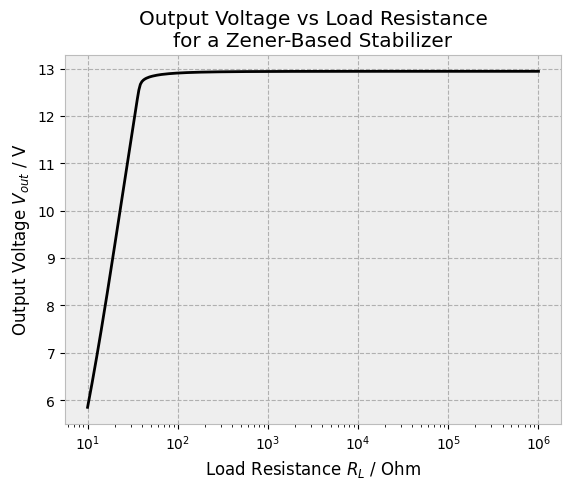

In [9]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Output Voltage vs Load Resistance\n"
    "for a Zener-Based Stabilizer"
)

# Load curve
plt.plot(R_out, np.array(data), "black", linewidth=2)

# Logarithmic scale for the load resistance
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Output Voltage $V_{out}$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

This time, compared to the previous system, we can see that the output voltage remains stable down to a certain load resistance. However, if the resistance is decreased further, the voltage drops sharply. This occurs because the transistor becomes saturated and can no longer supply more current than it is already delivering.

In [10]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 20 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1 @ u_kOhm               # R1 [Ω]
R_2 = 1.2 @ u_kOhm             # R2 [Ω]
R_3 = 4.7 @ u_kOhm             # R3 [Ω]
R_4 = 2.2 @ u_kOhm             # R4 [Ω]

circuit.R(4, 'collecteur', 'base', R_4)
circuit.R(3, 'collecteur', 'diode', R_3)
circuit.R(2, 'emettor', 'b_resistance', R_2)
circuit.R(1, 'b_resistance', circuit.gnd, R_1) 

# ------------------------------------------------------------
# Initialisation resistance courant
# ------------------------------------------------------------
circuit.R1.minus.add_current_probe(circuit)
circuit.R2.minus.add_current_probe(circuit)
circuit.R3.minus.add_current_probe(circuit)
circuit.R4.minus.add_current_probe(circuit)

# ------------------------------------------------------------
# Initialisation zener diode
# ------------------------------------------------------------
# Zener diode for base voltage stabilization
circuit.D('Z', circuit.gnd, 'diode', model='DZENER')
circuit.DZ.plus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(2, 'collecteur', 'base', 'emettor', model='2N2222A')
circuit.BJT(1, 'base', 'b_resistance', 'diode',  model='2N2222A')

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
# Résistance variable dans le temps (820 → 300 Ω à t = 0.5 s)
circuit.R('l', 'emettor', circuit.gnd, 'r = {820 - 520*u(time-0.003)}');
circuit.Rl.minus.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

# Simulation 1 seconde
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.0001@u_ms, end_time=10@u_ms)

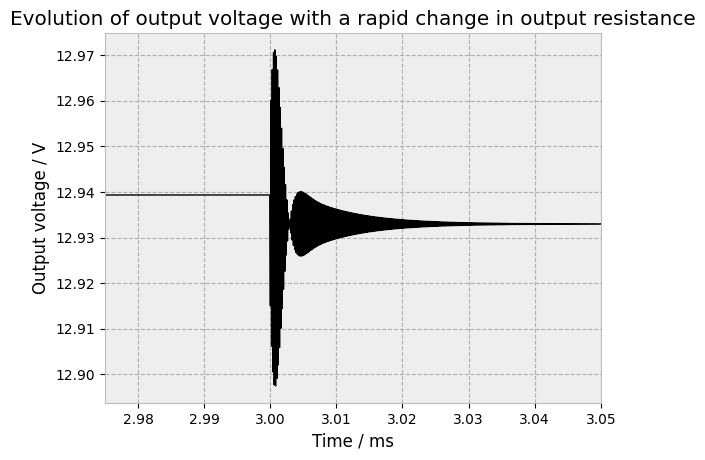

In [11]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Evolution of output voltage with a rapid change in output resistance")

# output voltage vs load resistance
plt.plot(analysis.time*1e3, analysis.nodes["emettor"], "black", lw=1)

# Axis labels
plt.ylabel("Output voltage / V")
plt.xlabel("Time / ms")
plt.xlim(2.975, 3.050)

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It is possible to observe the rapid evolution of the voltage in the circuit. Note that this is not fully representative of real conditions, as the load resistance is changed abruptly from 820 Ω to 300 Ω. However, it clearly demonstrates the operation of the feedback loop.

```{note}
It is possible to estimate the stabilization time.
```

### Evolution of the Power Dissipated in the Zener Diode

The objective is to examine how the power dissipated by the Zener diode varies as a function of the load resistance.

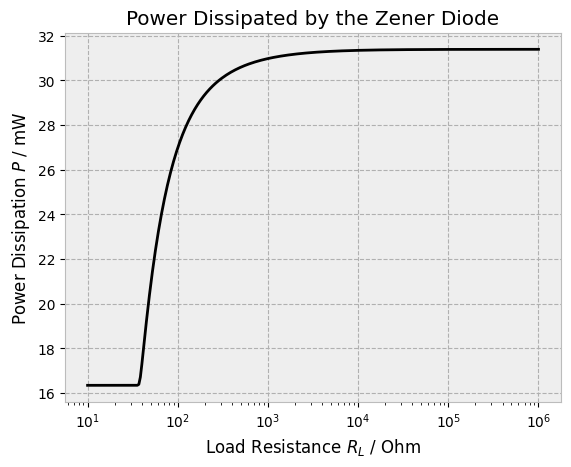

In [12]:
# ============================================================
# Zener Diode Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Zener Diode")

# Power vs load resistance (converted to mW)
plt.plot(R_out, np.array(diode) * 1e3, "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / mW")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

The power dissipated by the diode increases as the load resistance increases. Therefore, it is important to ensure that the diode can handle this power, especially if the system has no load connected.

### Evolution of the Power Dissipated in Transistor $Q_2$ as a Function of the Load Resistance

The objective is to examine how the power dissipated in the transistor changes as the load resistance is varied.

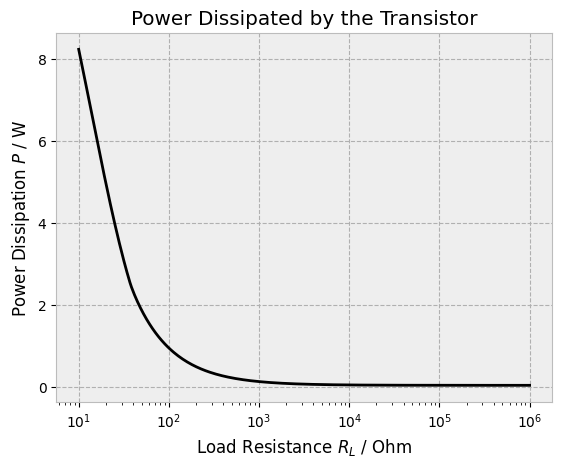

In [13]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissanceQ2), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that the power dissipated in the transistor is not constant as a function of the load resistance. When the load resistance is high, the power dissipated by the transistor is relatively low. However, as the load resistance decreases, the power dissipation increases significantly, following an approximately exponential trend. In the following sections, the goal will be to reduce this effect.

In the continuation of the chapter *Adding a Current Limiter*, the objective is to reduce the power dissipated when the load resistance becomes too low, thereby preventing damage to the transistor and, ultimately, to the entire electronic board.

## Adding a Current Limiter

This section is relatively short, but all the explanations and equations are almost identical to those for the stabilizer. For more information on the theoretical calculations and on how this kind of current limiter works, go here: [**Zener diode series stabilize**](./Diode_Zener)

### Electronics

In the schematic shown in [](#regulateur_tension_serie_transistor_2_limitor_courant), you can see the electronic design of the regulator. The circuit includes two additional components: a resistor and a bipolar transistor connected in parallel. These components are placed in series with the load resistor.

The operating principle is the following:
as soon as the voltage across $R_5$ exceeds approximately $\approx 0.7\ \text{V}$, the transistor switches from the cut-off region to the conduction region. When this happens, the transistor starts to divert part of the Zener diode’s current, which causes the Zener voltage to drop. As the Zener voltage decreases, the output voltage of the regulator also decreases, thereby reducing the current delivered to the load and protecting the circuit.

```{figure} ./images/regulateur_tension_serie_transistor_2_limitor_courant.svg
:name: regulateur_tension_serie_transistor_2_limitor_courant
:align: center
:width: 500px

Voltage Regulator with a current limiter
```

In the next section, we will examine how to implement this circuit in SPICE.

### SPICE Simulation

The corresponding SPICE implementation of the circuit is in the [](#regulateur_tension_serie_transistor_2_limitor_courant_spice):

```{figure} ./images/regulateur_tension_serie_transistor_2_limitor_courant_spice.svg
:name: regulateur_tension_serie_transistor_2_limitor_courant_spice
:align: center
:width: 500px

Voltage Regulator with a current limiter (SPICE)
```

In [19]:
def calcul_puissance(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by transistor Q1
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the transistor (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Collector current 
    # (SPICE convention: negative value means current entering the device)
    I_C = float(analysis.branches["vq2_collector"][0])

    # Collector and emitter voltages
    V_C = float(analysis.nodes['collecteur'][0])
    V_E = float(analysis.nodes['emettor'][0])

    # Collector–Emitter voltage
    V_CE = V_C - V_E

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Q = V_CE * I_C    # Power: P = VCE × IC

    return P_Q

In [45]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = -1
end   = 4
num   = 300
R_out = np.logspace(start, end, num)

data        = list()   # correspond à la tension de sortie
puissanceQ2 = list()   # correspond à la puissance absorbé par le transistor
diode       = list()   # correspond à la puissance absorbé par la diode zener
courant     = list()

for Rout in R_out : 
    # ============================================================
    # Circuit Definition : Montage Stabilisateur (Zener + BJT)
    # ============================================================
    
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 20 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    R_1 = 1 @ u_kOhm               # R1 [Ω]
    R_2 = 1.2 @ u_kOhm             # R2 [Ω]
    R_3 = 4.7 @ u_kOhm             # R3 [Ω]
    R_4 = 2.2 @ u_kOhm             # R4 [Ω]
    
    circuit.R(4, 'collecteur', 'base', R_4)
    circuit.R(3, 'collecteur', 'diode', R_3)
    circuit.R(2, 'emettor', 'b_resistance', R_2)
    circuit.R(1, 'b_resistance', circuit.gnd, R_1) 
    
    # ------------------------------------------------------------
    # Initialisation resistance courant
    # ------------------------------------------------------------
    circuit.R1.minus.add_current_probe(circuit)
    circuit.R2.minus.add_current_probe(circuit)
    circuit.R3.minus.add_current_probe(circuit)
    circuit.R4.minus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Initialisation zener diode
    # ------------------------------------------------------------
    # Zener diode for base voltage stabilization
    circuit.D('Z', circuit.gnd, 'diode', model='DZENER')
    circuit.DZ.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(2, 'collecteur', 'base', 'emettor', model='2N2222A')
    circuit.BJT(1, 'base', 'b_resistance', 'diode',  model='2N2222A')

    circuit.Q2.collector.add_current_probe(circuit)

    # ------------------------------------------------------------
    # Courant Limitor
    # ------------------------------------------------------------
    R_2 = 3.3 @ u_Ohm               # Base resistor [Ω]
    
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(3, 'base', 'emettor', 'out', model='2N2222A')
    circuit.R(5, "emettor", "out", R_2)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'out', circuit.gnd, R_emitter)
    circuit.Rl.plus.add_current_probe(circuit)

    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()

    courant.append(float(analysis.branches["vrl_plus"][0]))
    data.append(float(analysis['emettor'][0]))
    puissanceQ2.append(calcul_puissance(analysis))
    diode.append(float(analysis.nodes["diode"][0]))

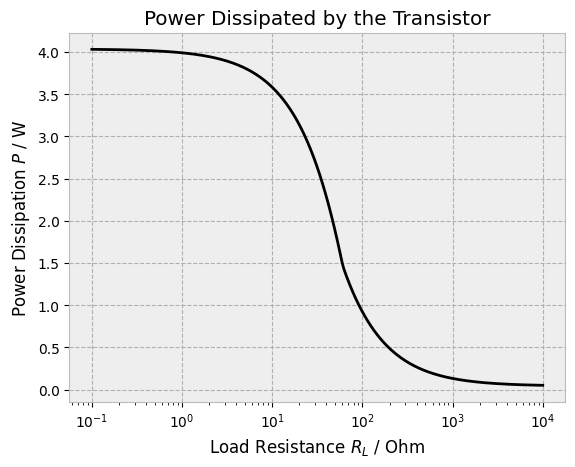

In [46]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissanceQ2), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

In this graph, one might wonder what the current limiter actually accomplishes, since the power dissipated by the transistor still increases. However, unlike the configuration without the current limiter, we can now observe the beginning of a power-limiting effect. The limiter does not completely prevent the power from rising, but it significantly slows down its increase once the current approaches the imposed limit.

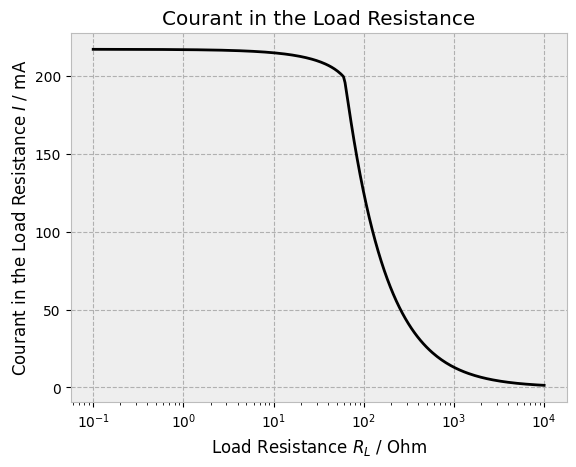

In [47]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(R_out, np.array(courant)*1e3, "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Courant in the Load Resistance $I$ / mA")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

As previously discussed, the collector current of transistor $Q_2$ begins to absorb the normal operating current of the Zener diode. This reduction in Zener current causes its voltage to drop. Since the Zener voltage decreases, the output voltage across the load resistor also decreases, which in turn reduces the current delivered to the load. This mechanism provides an additional layer of protection for the circuit by naturally limiting both the Zener stress and the output current.

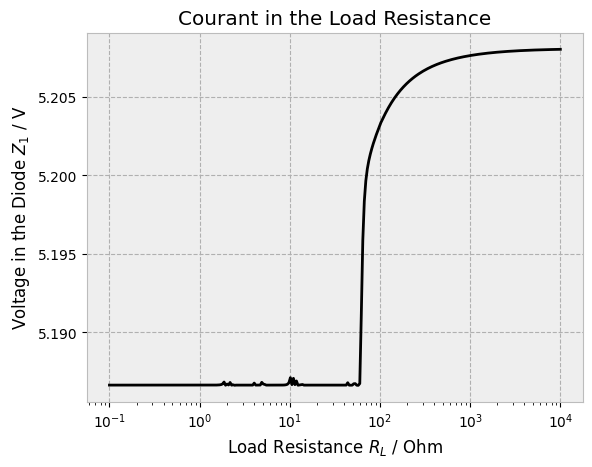

In [48]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(R_out, np.array(diode), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Voltage in the Diode $Z_1$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

This time, the Zener diode voltage does not drop as much as expected. This is due to the fact that transistor $Q_1$ significantly limits how far the voltage can fall.

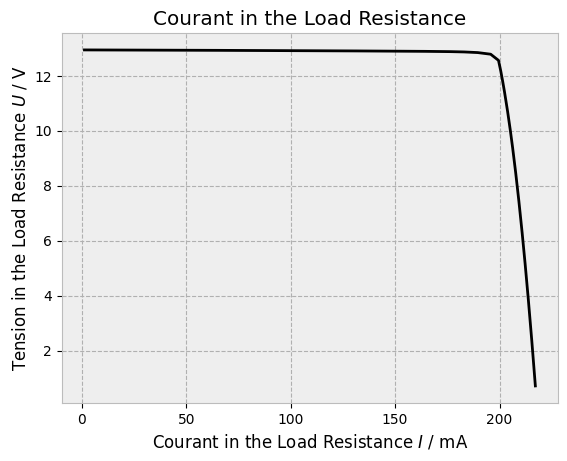

In [49]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(np.array(courant)*1e3, np.array(data), "black", linewidth=2)

# Axis labels
plt.xlabel("Courant in the Load Resistance $I$ / mA")
plt.ylabel("Tension in the Load Resistance $U$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================


This graph is, in my opinion, the most representative one. As soon as the current exceeds a certain threshold, the output voltage drops sharply. This abrupt decrease clearly demonstrates the effectiveness of the current limiter and highlights its importance in protecting the circuit.

```{note}
The advantage of this circuit compared with a simple Zener regulator is that—even when the current-limiting resistor (sense resistor + limiter transistor) is effectively in parallel with the load—it absorbs some of the delivered power, which tends to lower the load voltage. If the regulator’s feedback loop can compensate, the output voltage will be held; otherwise the load voltage will drop. In practice, the limiter only starts to significantly clamp the output when the voltage across the sense element reaches roughly $0.7 \ \text{V}$ (the transistor’s $V_{BE}$), at which point the limiter transistor begins to conduct and shunts base drive away from the pass device.
```

## Reference 

* https://www.youtube.com/watch?v=qJXxw_bw5Jg